# Notebook for assessing video input parameters for tracker.py

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import trackpy as tp
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.animation as animation

import tracker
import stats
import visualizer
import utils

import importlib

(1024, 1024)


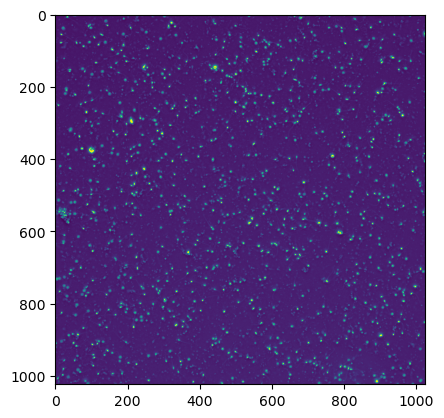

In [17]:
videofile = "C:/Users/cameron schmidt/Desktop/PyProj/ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

#convert to grayscale
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

print(gray.shape)

plt.imshow(gray)

           y           x         mass      size       ecc      signal  \
0   3.694867   56.162072  1182.335142  1.650124  0.271927  115.760950   
4   4.110956  982.299721  1610.538268  1.728522  0.214755  133.743234   
8   4.854494  536.594518  1394.188919  1.831143  0.184755  101.150345   
9   5.494593  662.605548  1195.259908  1.681364  0.093130  112.951218   
15  7.493576   33.790975  1793.170835  1.843450  0.142812  133.743234   

    raw_mass        ep  
0     4429.0  0.024393  
4     5510.0  0.016902  
8     5210.0  0.018477  
9     4525.0  0.023469  
15    5802.0  0.015608  
                 y            x         mass        size         ecc  \
count   539.000000   539.000000   539.000000  539.000000  539.000000   
mean    513.601455   490.538438  1444.073909    1.791311    0.165587   
std     288.927779   283.504961   259.820228    0.099585    0.084072   
min       3.694867     7.408488   764.808996    1.516187    0.003338   
25%     268.571540   247.466791  1291.071762    1.7

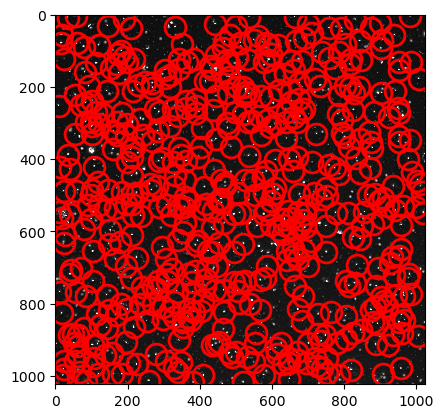

<AxesSubplot:>

In [47]:
f = tp.locate(gray, 9, minmass=750, maxsize=2)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

print(f.head())

print(f.describe())

# Visualize
tp.annotate(f, gray)

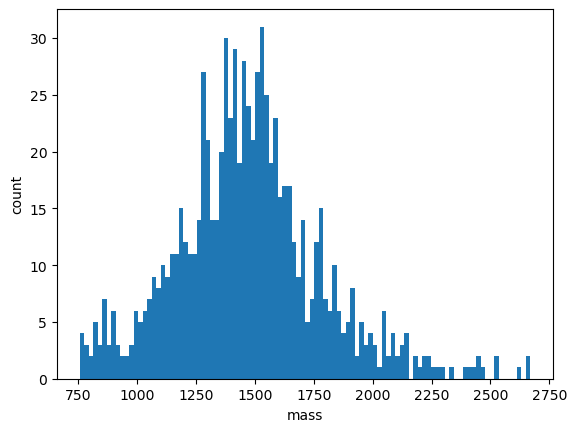

In [35]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=100)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

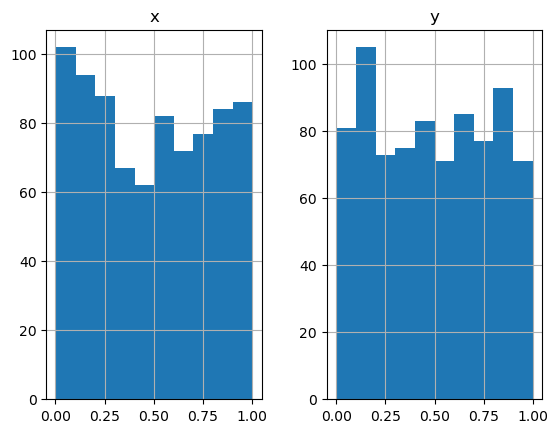

In [36]:
tp.subpx_bias(f)

In [41]:
f = tp.batch(gray, 11, minmass=1000)

Frame 1023: 0 features


C:\Users\cameron schmidt\anaconda3\envs\Test_env\lib\site-packages\trackpy\feature.py:587: UserWarning: No maxima found in any frame.
  warnings.warn("No maxima found in any frame.")
